In [1]:
import numpy as np
import pandas as pd
import mnist as mnist
import matplotlib.pyplot as plt
import seaborn as sn

from convolution import Convolution
from maxpool import MaxPool
from softmax import Softmax

In [18]:
train_images = mnist.train_images()[:3000]
train_labels = mnist.train_labels()[:3000]
test_images = mnist.test_images()[:3000]
test_labels = mnist.test_labels()[:3000]

In [35]:
train_loss = []
train_acc = []

In [36]:
conv = Convolution(8)
pool = MaxPool()
softmax = Softmax(13 * 13 * 8, 10)

epochs = 10

def forward(image, label):
    x = conv.forward((image/255) - 0.5)
    x = pool.forward(x)
    x = softmax.forward(x)

    loss = -np.log(x[label])
    acc = 1 if (np.argmax(x) == label) else 0

    return x, loss, acc


def train(im, label, lr=0.005):
    x, loss, acc = forward(im, label)

    gradient = np.zeros(10)
    gradient[label] = -1/x[label]

    gradient = softmax.backprop(gradient, lr)
    gradient = pool.backprop(gradient)
    gradient = conv.backprop(gradient, lr)

    return loss, acc


for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')

    permutation = np.random.permutation(len(train_images))
    train_images = train_images[permutation]
    train_labels = train_labels[permutation]

    loss = 0
    num_correct = 0

    for i, (im, label) in enumerate(zip(train_images, train_labels)):

        if (i > 0 and i % 100 == 99):
            print(f'avg train loss: {loss / 100:.3f} | acc: {num_correct}%')
            train_loss.append(loss / 100)
            train_acc.append(num_correct)
            loss = 0
            num_correct = 0
        l, acc = train(im, label)
        loss += l
        num_correct += acc

Epoch 1/10
avg train loss: 2.202 | acc: 22%
avg train loss: 1.965 | acc: 41%
avg train loss: 1.655 | acc: 51%
avg train loss: 1.323 | acc: 56%
avg train loss: 0.874 | acc: 73%
avg train loss: 0.874 | acc: 71%
avg train loss: 0.799 | acc: 73%
avg train loss: 0.733 | acc: 76%
avg train loss: 0.742 | acc: 81%
avg train loss: 0.689 | acc: 78%
avg train loss: 0.729 | acc: 72%
avg train loss: 0.614 | acc: 84%
avg train loss: 0.492 | acc: 84%
avg train loss: 0.478 | acc: 84%
avg train loss: 0.658 | acc: 77%
avg train loss: 0.599 | acc: 82%
avg train loss: 0.503 | acc: 86%
avg train loss: 0.362 | acc: 87%
avg train loss: 0.536 | acc: 85%
avg train loss: 0.526 | acc: 85%
avg train loss: 0.511 | acc: 88%
avg train loss: 0.417 | acc: 90%
avg train loss: 0.378 | acc: 92%
avg train loss: 0.446 | acc: 87%
avg train loss: 0.627 | acc: 82%
avg train loss: 0.419 | acc: 87%
avg train loss: 0.400 | acc: 86%
avg train loss: 0.341 | acc: 89%
avg train loss: 0.590 | acc: 77%
avg train loss: 0.586 | acc: 78%

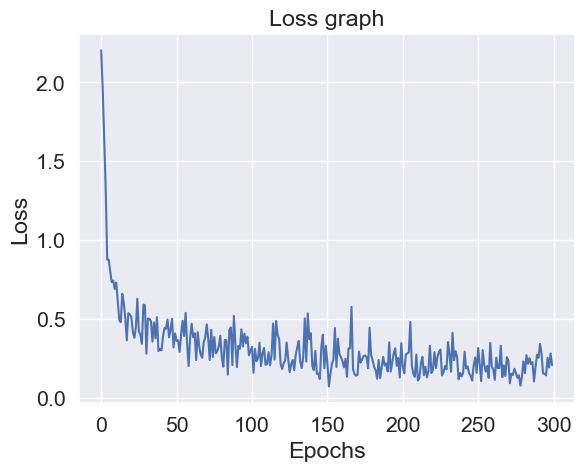

In [39]:
plt.plot(train_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss graph')
plt.show()

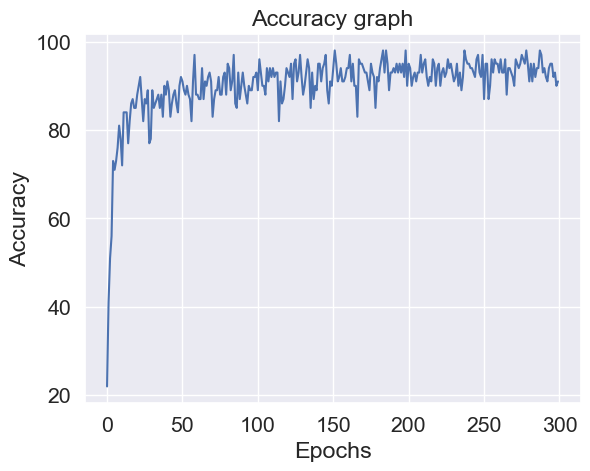

In [40]:
plt.plot(train_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy graph')
plt.show()

In [41]:
def predict(image):
    out = conv.forward((image / 255) - 0.5)
    out = pool.forward(out)
    out = softmax.forward(out)

    predicted_class = np.argmax(out)

    return predicted_class

In [42]:
for i in range(5):
    rand = np.random.randint(0, len(test_images))
    image = test_images[rand]
    prediction = predict(image)

    print("Actual label: ", test_labels[rand])
    print("Predicted label: ", prediction)

Actual label:  4
Predicted label:  4
Actual label:  4
Predicted label:  4
Actual label:  2
Predicted label:  9
Actual label:  4
Predicted label:  4
Actual label:  2
Predicted label:  2


In [43]:
acc = 0
for i in range(len(test_images)):
    image = test_images[i]
    prediction = predict(image)
    if prediction == test_labels[i]:
        acc += 1

print(f"Test accuracy: {acc / len(test_images) * 100:.3f}%")

Test accuracy: 88.467%


Actual label:  3
Predicted label:  3


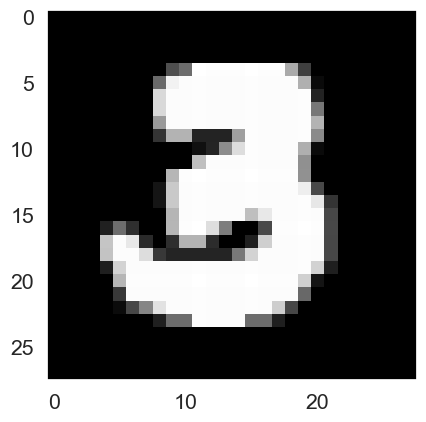

Actual label:  4
Predicted label:  4


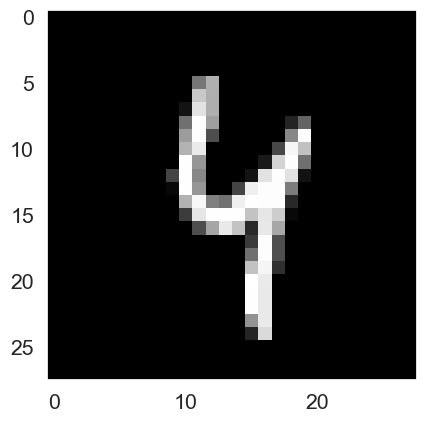

Actual label:  8
Predicted label:  8


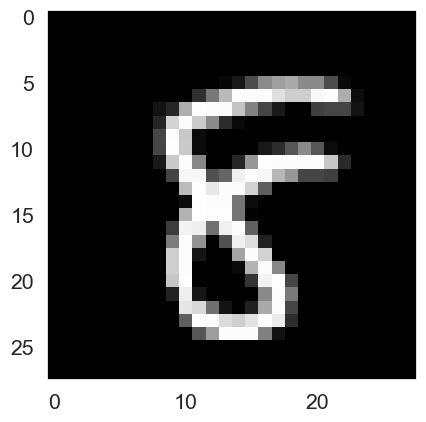

Actual label:  8
Predicted label:  8


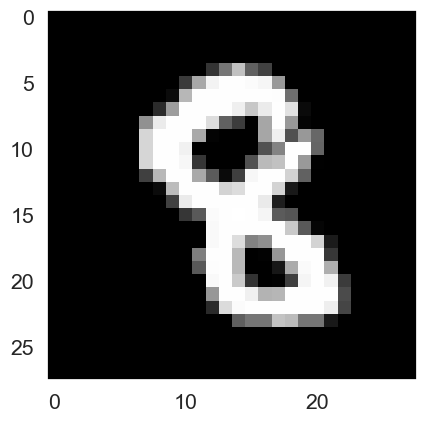

Actual label:  1
Predicted label:  1


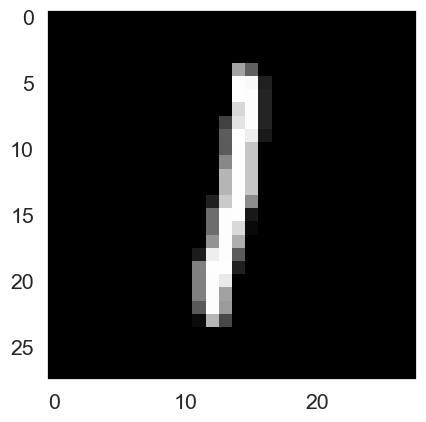

In [23]:
for i in range(5):
    rand = np.random.randint(0, len(test_images))
    image = test_images[rand]
    prediction = predict(image)

    print("Actual label: ", test_labels[rand])
    print("Predicted label: ", prediction)

    plt.imshow(image, cmap='gray')
    plt.grid(False)
    plt.show()

In [45]:
confusion_matrix = np.zeros((10, 10))
for i in range(len(test_images)):
    prediction = predict(test_images[i])
    actual = test_labels[i]
    confusion_matrix[actual][prediction] += 1
print(confusion_matrix)

[[252.   0.   8.   0.   0.   3.   5.   0.   3.   0.]
 [  0. 334.   1.   0.   1.   0.   3.   0.   1.   0.]
 [  1.   2. 274.   1.   4.   3.   1.   7.  18.   2.]
 [  2.   0.  14. 241.   1.  31.   3.  11.  11.   2.]
 [  0.   1.   1.   0. 299.   1.   3.   3.   3.   7.]
 [  5.   0.   2.   3.   5. 241.   3.   6.  17.   1.]
 [  4.   2.   4.   0.   9.   6. 236.   5.   6.   0.]
 [  0.   3.  15.   1.   2.   0.   0. 271.   2.  12.]
 [  1.   2.   3.   5.  11.   3.   0.   4. 255.   2.]
 [  2.   2.   3.   3.  15.   3.   0.  12.   4. 251.]]


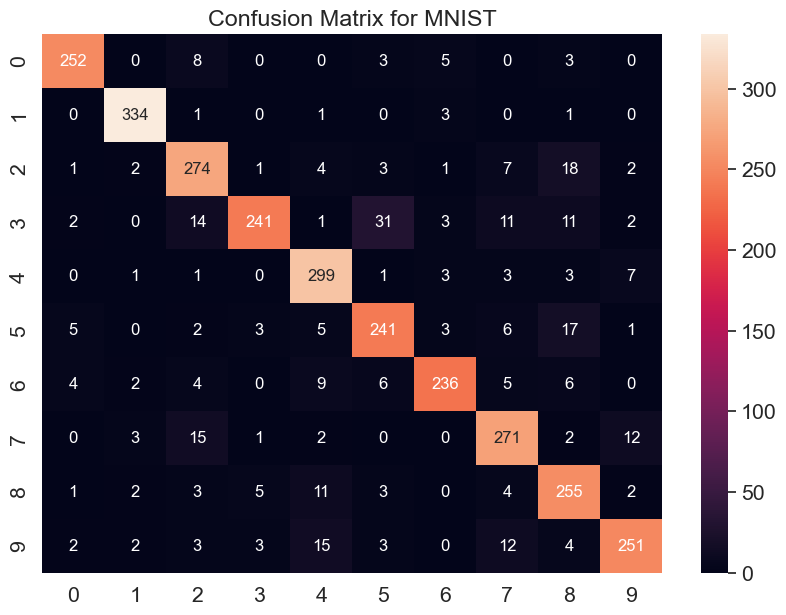

In [46]:
df_cm = pd.DataFrame(confusion_matrix, range(10), range(10))
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix for MNIST')
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g')  # font size
plt.show()